<h3 align="right">mCP, &nbsp; dSPN, &nbsp; 160118_c8_D1, &nbsp; animal_5_n27_04102017_cel2 </h3>

# Model selection

## Model data

In [1]:
import cell_model, cell_evaluator
morphofile = 'morphology/animal_5_n27_04102017_cel2.swc'
parameters = cell_model.define_parameters('parameters.json')
mechanisms = cell_model.define_mechanisms('mechanisms.json')
protocols = cell_evaluator.define_protocols('protocols.json')
calculator = cell_evaluator.define_fitness_calculator(protocols, 'features.json')
expdata = {
    'IV_546.soma.v': 'expdata/ECall_IV_ch5_546.dat',
    'IV_556.soma.v': 'expdata/ECall_IV_ch5_556.dat',    
    'IDthresh-sub_586.soma.v': 'expdata/ECall_IDthresh_ch5_586.dat',    
    'IDthresh_588.soma.v': 'expdata/ECall_IDthresh_ch5_588.dat',    
    'IDthresh_589.soma.v': 'expdata/ECall_IDthresh_ch5_589.dat',    
    'IDthresh_599.soma.v': 'expdata/ECall_IDthresh_ch5_599.dat',    
}

## Simulation environment

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
import json
import pandas
import efel
import numpy as np
import bluepyopt as bpopt
import bluepyopt.ephys as ephys

In [4]:
from utils import *

In [5]:
%%capture
!rm -rf x86_64
!nrnivmodl mechanisms

## Cell model definition

In [6]:
morphology = ephys.morphologies.NrnFileMorphology(
    morphofile, do_replace_axon=True)

In [7]:
cell = ephys.models.CellModel(
    'dspn', 
    morph=morphology, 
    mechs=mechanisms, 
    params=parameters)
print (cell)

dspn:
  morphology:
    morphology/animal_5_n27_04102017_cel2.swc
  mechanisms:
    pas.all: pas at ['all']
    naf.somatic: naf at ['somatic']
    kaf.somatic: kaf at ['somatic']
    kas.somatic: kas at ['somatic']
    kdr.somatic: kdr at ['somatic']
    kir.somatic: kir at ['somatic']
    cal12.somatic: cal12 at ['somatic']
    cal13.somatic: cal13 at ['somatic']
    can.somatic: can at ['somatic']
    car.somatic: car at ['somatic']
    cadyn.somatic: cadyn at ['somatic']
    caldyn.somatic: caldyn at ['somatic']
    sk.somatic: sk at ['somatic']
    bk.somatic: bk at ['somatic']
    Im.somatic: Im at ['somatic']
    naf.axonal: naf at ['axonal']
    kas.axonal: kas at ['axonal']
    Im.axonal: Im at ['axonal']
    naf.basal: naf at ['basal']
    kaf.basal: kaf at ['basal']
    kas.basal: kas at ['basal']
    kdr.basal: kdr at ['basal']
    kir.basal: kir at ['basal']
    cal12.basal: cal12 at ['basal']
    cal13.basal: cal13 at ['basal']
    car.basal: car at ['basal']
    cat32.ba

In [8]:
opt_params = [p.name for p in cell.params.values() if not p.frozen]
opt_bounds = [p.bounds for p in cell.params.values() if not p.frozen]
for x in sorted(opt_params): print (x)

g_pas.axonal
g_pas.basal
g_pas.somatic
gbar_Im.axonal
gbar_Im.somatic
gbar_bk.basal
gbar_bk.somatic
gbar_kaf.basal
gbar_kaf.somatic
gbar_kas.axonal
gbar_kas.basal
gbar_kas.somatic
gbar_kdr.basal
gbar_kdr.somatic
gbar_kir.basal
gbar_kir.somatic
gbar_naf.axonal
gbar_naf.basal
gbar_naf.somatic
gbar_sk.basal
gbar_sk.somatic


## Cell evaluator

In [9]:
simulator = ephys.simulators.NrnSimulator()

In [10]:
evaluator = ephys.evaluators.CellEvaluator(
    cell_model=cell,
    param_names=opt_params,
    fitness_protocols=protocols,
    fitness_calculator=calculator,
    sim=simulator)

## Optimisation results

In [11]:
with open('log.json') as fp:
    log = json.load(fp)

<IPython.core.display.Javascript object>


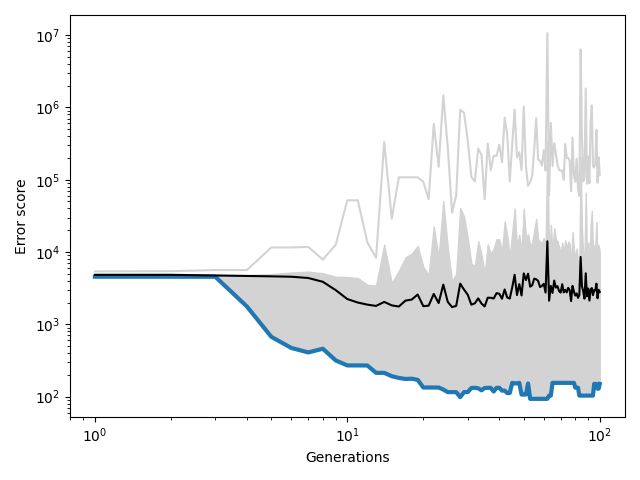

In [12]:
plot_log(log)

In [13]:
best_models = json.load(open('best_models.json'))
pandas.options.display.float_format = '{:,.4g}'.format
bm = pandas.DataFrame(best_models)
bm.T

,0,1,2,3,4,5,6,7,8,9
g_pas.axonal,0.01815,0.1191,0.02092,0.1181,0.1118,0.01815,0.1048,0.1181,0.07603,0.05992
g_pas.somatic,0.0006387,0.0003102,0.001208,0.0003773,0.0004686,0.0006387,0.0003484,0.0003158,0.0002236,0.0004655
g_pas.basal,3.357e-05,2.132e-05,6.982e-06,3.649e-05,3.55e-05,1.946e-05,2.009e-05,3.813e-05,3.641e-05,1.143e-05
gbar_naf.axonal,9.703,5.322,9.649,7.771,10.31,5.369,8.994,4.47,6.137,5.663
gbar_kas.axonal,0.05684,0.03094,0.05158,0.09868,0.03896,0.05684,0.09683,0.0303,0.04034,0.06634
gbar_Im.axonal,0.0008428,0.0009403,0.0006996,0.0008967,0.0008959,0.0008401,0.0009962,0.0009403,0.0009354,0.0009788
gbar_naf.somatic,11.4,11.1,11.57,10.22,12.65,11.41,11.26,10.37,12.12,10.58
gbar_kaf.somatic,0.5764,0.48,0.5009,0.3243,0.5972,0.5764,0.5576,0.3062,0.707,0.4907
gbar_kas.somatic,0.0007678,6.152e-07,0.0008858,0.002628,0.0006377,0.0007678,6.356e-07,6.57e-06,0.0005826,4.612e-05
gbar_kdr.somatic,0.0004773,0.0009415,0.0005781,0.0006418,6.551e-05,0.0004667,0.000498,0.0004692,0.0008421,0.0007479


<IPython.core.display.Javascript object>


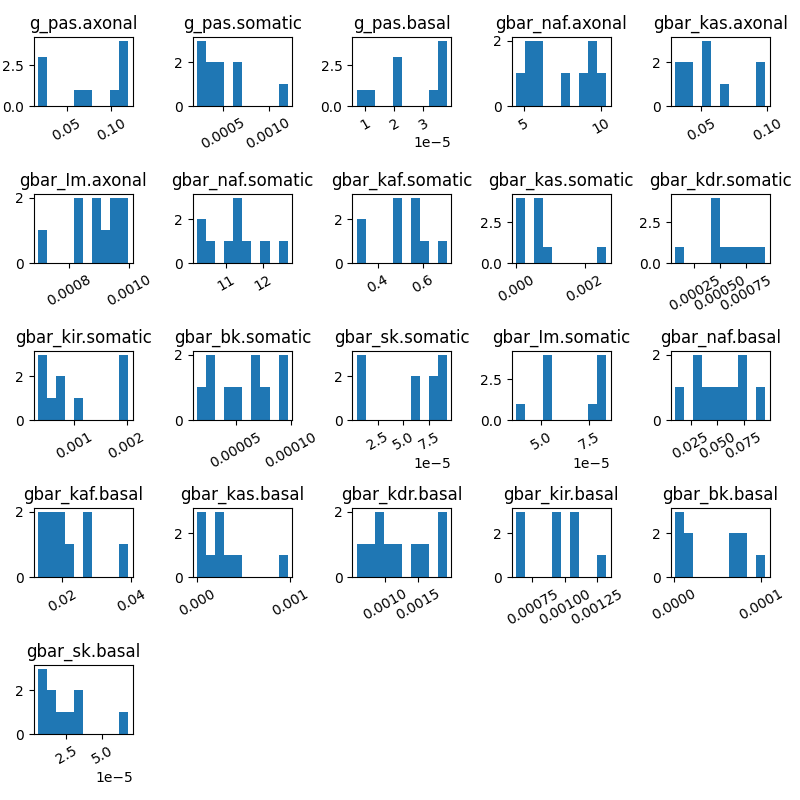

In [14]:
axs = bm.hist(grid=False, xrot=30, figsize=(8,8))
plt.tight_layout();

<IPython.core.display.Javascript object>


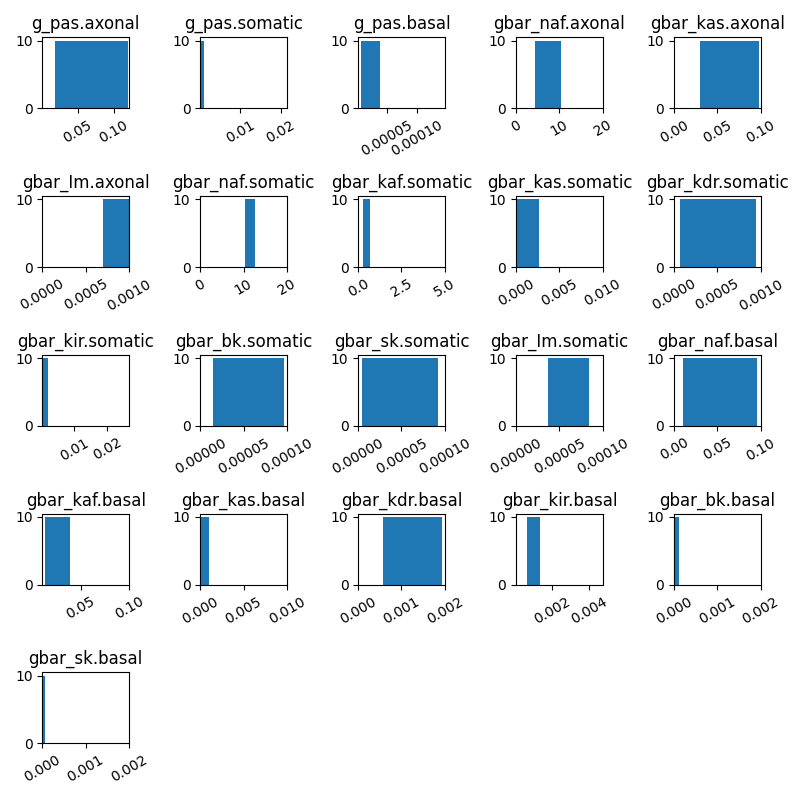

In [15]:
axs = bm.hist(bins=1, grid=False, xrot=30, figsize=(8,8))
for ax, bounds in zip(axs.flatten(), opt_bounds):
        ax.set_xlim(bounds)
plt.tight_layout();

In [16]:
evaluate_all = True
best_objectives = []
if evaluate_all:
    for params in best_models:
        objectives = evaluator.evaluate_with_dicts(params)
        best_objectives.append(objectives)
    df = pandas.DataFrame(best_objectives).T
    df = df.sort_index(axis=0, ascending=False)

<IPython.core.display.Javascript object>


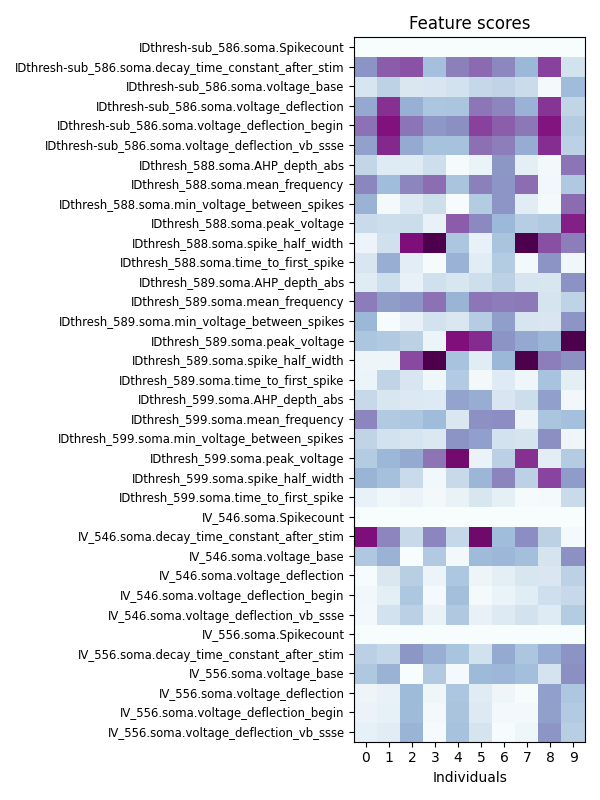

In [17]:
if evaluate_all:
    plot_scores(df, figsize=(6, 8), vmin=0, vmax=10)

## Single-cell simulation

In [18]:
ind = 0 # 7
test_parameters = best_models[ind]
#test_parameters

In [19]:
"""
test_parameters = {
 'g_pas.axonal': 0.0522614390490545,
 'g_pas.somatic': 0.0002221356682615811,
 'g_pas.basal': 1.3287393288064948e-05,
 'gbar_naf.axonal': 3.907524123941544*0.9,
 'gbar_kas.axonal': 0.8092026041772808*0.1,
 'gbar_Im.axonal': 0.013798429131281487*0.1,
 'gbar_naf.somatic': 12.05623533339749*0.9,
 'gbar_kaf.somatic': 0.668265014990148*0.9,
 'gbar_kas.somatic': 0.0030085362050084317*0.1,
 'gbar_kdr.somatic': 0.009664403064277816*0.1,
 'gbar_kir.somatic': 0.00026976127926114837,
 'gbar_bk.somatic': 1e-4, #0.0001444071166319357,
 'gbar_sk.somatic': 1e-4, #0.00043876369625630023,
 'gbar_Im.somatic': 0.0015297869825603764*0.1,
 'gbar_naf.basal': 0.05895007515513068,
 'gbar_kaf.basal': 0.011476897881306965,
 'gbar_kas.basal': 0.00022037169668689155,
 'gbar_kdr.basal': 0.00022035482702281975,
 'gbar_kir.basal': 0.0015053518929334666,
 'gbar_bk.basal': 2.3951778068721904e-06,
 'gbar_sk.basal': 1.076578406281162e-05
}
"""

"\ntest_parameters = {\n 'g_pas.axonal': 0.0522614390490545,\n 'g_pas.somatic': 0.0002221356682615811,\n 'g_pas.basal': 1.3287393288064948e-05,\n 'gbar_naf.axonal': 3.907524123941544*0.9,\n 'gbar_kas.axonal': 0.8092026041772808*0.1,\n 'gbar_Im.axonal': 0.013798429131281487*0.1,\n 'gbar_naf.somatic': 12.05623533339749*0.9,\n 'gbar_kaf.somatic': 0.668265014990148*0.9,\n 'gbar_kas.somatic': 0.0030085362050084317*0.1,\n 'gbar_kdr.somatic': 0.009664403064277816*0.1,\n 'gbar_kir.somatic': 0.00026976127926114837,\n 'gbar_bk.somatic': 1e-4, #0.0001444071166319357,\n 'gbar_sk.somatic': 1e-4, #0.00043876369625630023,\n 'gbar_Im.somatic': 0.0015297869825603764*0.1,\n 'gbar_naf.basal': 0.05895007515513068,\n 'gbar_kaf.basal': 0.011476897881306965,\n 'gbar_kas.basal': 0.00022037169668689155,\n 'gbar_kdr.basal': 0.00022035482702281975,\n 'gbar_kir.basal': 0.0015053518929334666,\n 'gbar_bk.basal': 2.3951778068721904e-06,\n 'gbar_sk.basal': 1.076578406281162e-05\n}\n"

In [20]:
test_responses = evaluator.run_protocols(
    protocols=protocols.values(), 
    param_values=test_parameters)

<IPython.core.display.Javascript object>


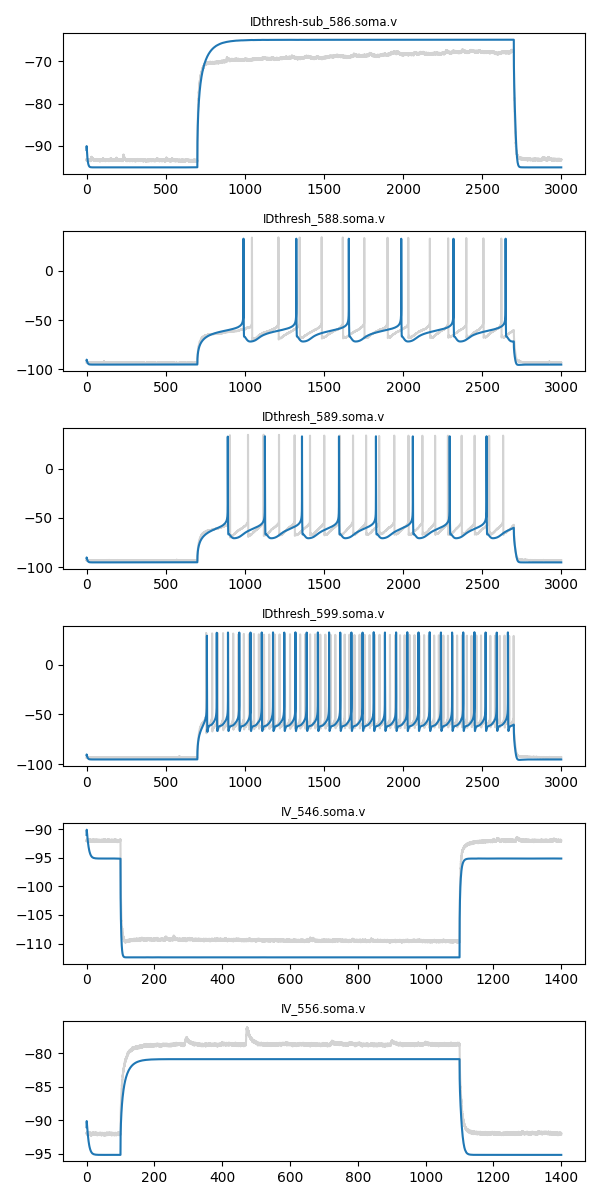

In [21]:
plot_responses(test_responses, expdata=expdata, junction_potential=11.5, figsize=(6,12))

<IPython.core.display.Javascript object>


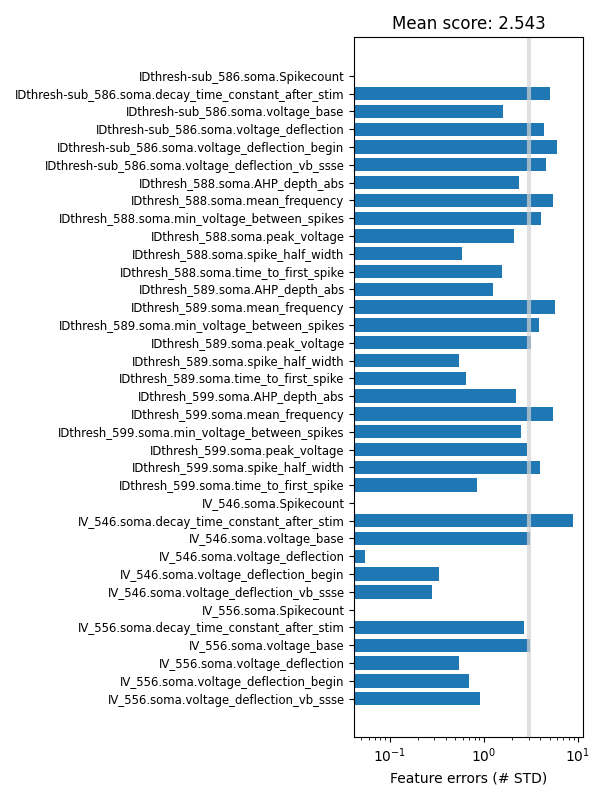

In [22]:
if evaluate_all:
    objectives = best_objectives[ind]
else:
    objectives = evaluator.evaluate_with_dicts(test_parameters)
plot_objectives(objectives, figsize=(6,8))

In [23]:
from numpy.linalg import norm
d = []
for i in range(len(best_models)):
    v = []
    for j in range(len(best_models)):
        p1 = np.array([best_models[i][p] for p in sorted(best_models[i])])
        p2 = np.array([best_models[j][p] for p in sorted(best_models[j])])
        v.append(norm((p1-p2)/(p1+p2)))
    d.append(v)
df = pandas.DataFrame(data=np.round(d,2))
def highlight_low(x):
    def c(v):
        r = int(v/x.max()*255)
        g = int(v/x.max()*128)+127
        b = 255
        return '#%02x%02x%02x' % (r, g, b)
    return ['background-color: %s' % c(v) for v in x]
df.style.apply(highlight_low)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,2.090000,1.480000,2.040000,1.540000,1.320000,1.890000,2.190000,1.740000,1.880000
1,2.090000,0.000000,2.080000,2.190000,2.220000,1.800000,1.590000,1.280000,1.590000,1.950000
2,1.480000,2.080000,0.000000,1.970000,1.950000,1.480000,2.050000,2.160000,1.920000,1.710000
3,2.040000,2.190000,1.970000,0.000000,1.820000,1.950000,1.690000,2.120000,2.180000,1.860000
4,1.540000,2.220000,1.950000,1.820000,0.000000,1.800000,1.850000,2.270000,1.860000,2.060000
5,1.320000,1.800000,1.480000,1.950000,1.800000,0.000000,1.550000,1.840000,1.740000,1.930000
6,1.890000,1.590000,2.050000,1.690000,1.850000,1.550000,0.000000,1.880000,1.990000,1.900000
7,2.190000,1.280000,2.160000,2.120000,2.270000,1.840000,1.880000,0.000000,1.550000,1.920000
8,1.740000,1.590000,1.920000,2.180000,1.860000,1.740000,1.990000,1.550000,0.000000,1.890000
9,1.880000,1.950000,1.710000,1.860000,2.060000,1.930000,1.900000,1.920000,1.890000,0.000000


In [24]:
hall_of_fame = []
selected = range(10)
for model in selected:
    hall_of_fame.append(best_models[model])
with open('hall_of_fame.json', 'w') as fp:
    json.dump(hall_of_fame, fp, indent=4, sort_keys=True)

In [25]:
zscores = pandas.DataFrame(best_objectives).mean(axis=1)
print(f'Z-score mean {zscores.mean():.3f}, range {zscores.min():.3f}-{zscores.max():.3f}')

Z-score mean 2.991, range 2.543-3.321
